###final capstone project - customer conversion prediction
###step 1: import the data set and veiw it as a dataframe 
###step 2: check for proper datatypes of the colunm data
###step 3: check for missing values or null values
###step 4: check for outliers
###step 6: check for relation between each feature and target variable


In [307]:
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
dfr=pd.read_csv('datasets/train.csv')

In [309]:
dfr

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


###
DATA VALIDATION

In [310]:
dfr.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [311]:
dfr.isnull().sum()

#no null vaues


age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [312]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [313]:
dfr.shape

(45211, 11)

In [314]:
dfr.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [315]:
dfr['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [316]:
dfr['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [317]:
dfr['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [318]:
dfr['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [319]:
dfr['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [320]:
dfr['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [321]:
dfr.describe()


,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


    ###DATA PREPROCESSING , DATA CLEANING

In [322]:
## check for duplicates and delete them
dfr.duplicated().sum()


6

In [324]:
dfr=dfr.drop_duplicates()
dfr

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


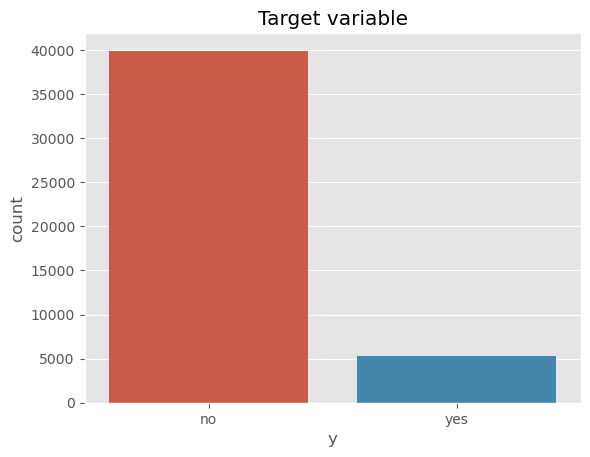

In [325]:
#check whether the data is balanced by plotting the same below value counts
dfr['y'].value_counts()
sns.countplot(x='y',data=dfr)
plt.title("Target variable")
plt.show()

In [326]:
## duplicates are dropped from the data frame
dfr.duplicated().sum()

0

In [327]:
##converting the target col yes and no into numerical mapping 
dfr['y']=dfr['y'].map({"yes":1,"no":0})

In [328]:
dfr.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


In [329]:
#count of values for a particular age
dfr.age.value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [330]:
from pandas_profiling import ProfileReport
pf=ProfileReport(dfr)

In [331]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [332]:
#percentage of class present in the target variable  y 
print('percentage of NO or YES\n',dfr['y'].value_counts()/len(dfr)*100)

percentage of NO or YES
 0    88.299967
1    11.700033
Name: y, dtype: float64


### from the above analysis we can see that target variable has more no values than yes making it an imbalanced data

##univarient analysis of categorical data


Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')


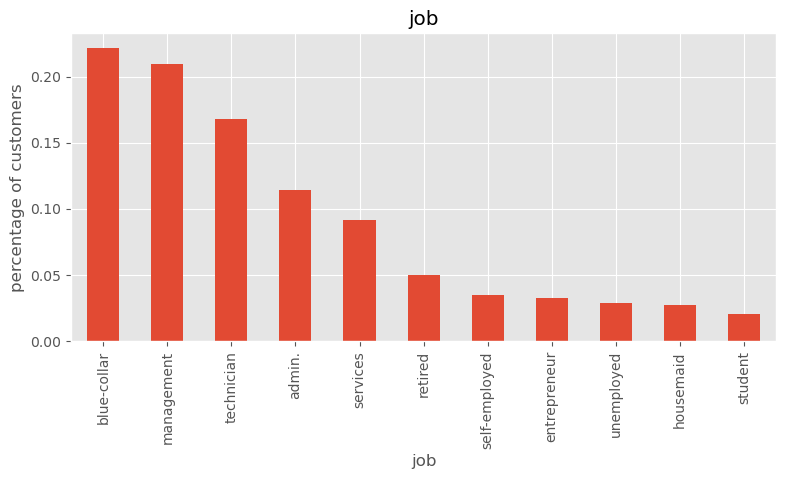

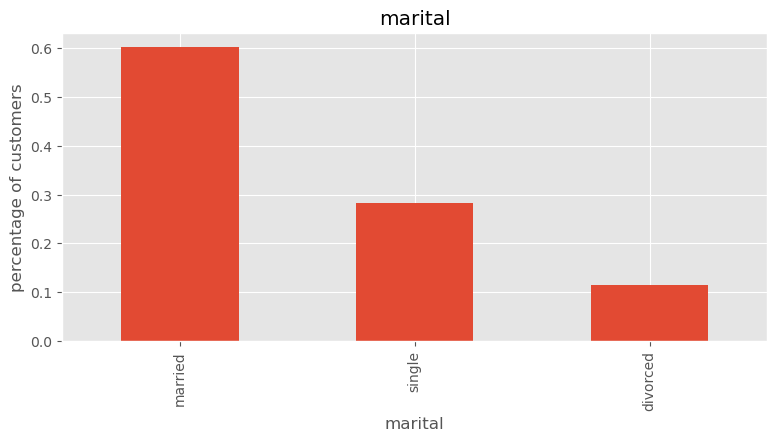

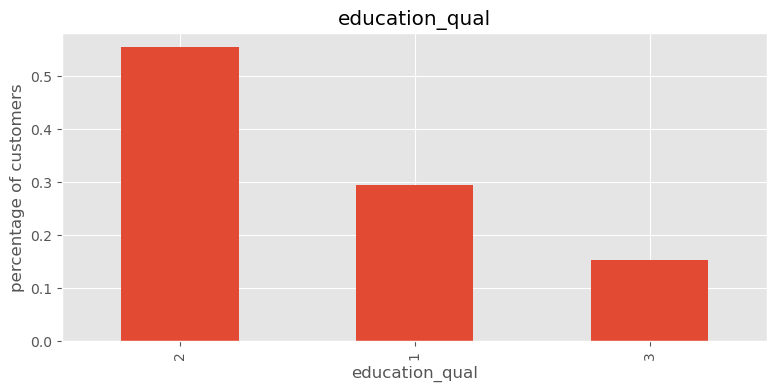

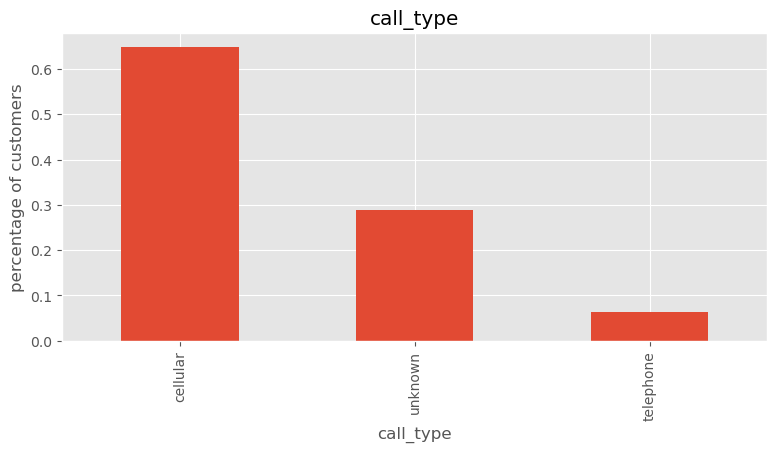

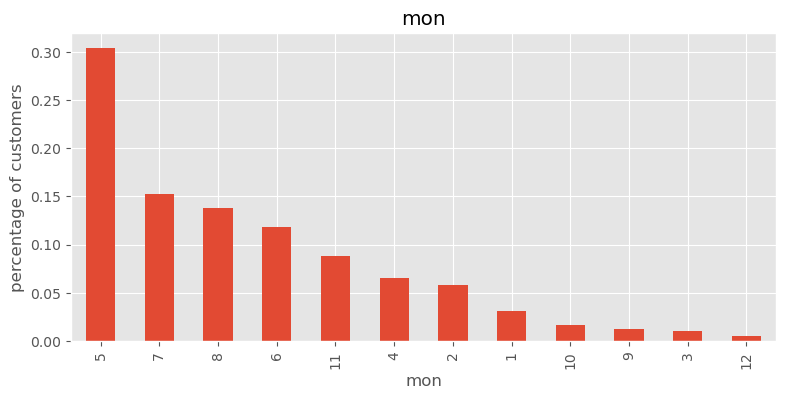

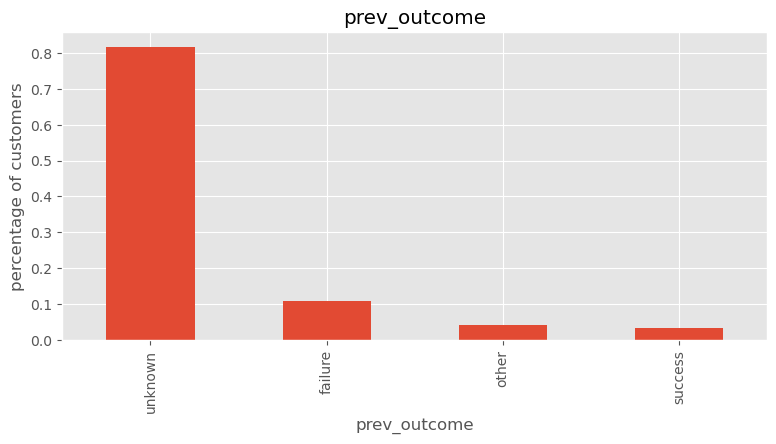

In [333]:
#identifying the categorical variables and plotting bar chart for each 
cat_var=dfr.select_dtypes(include=['object']).columns
print(cat_var)

plt.style.use("ggplot")
for column in cat_var:
    plt.figure(figsize=(20,4))
    ax=plt.subplot(121)
    df[column].value_counts(normalize=True).plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('percentage of customers')
    plt.title(column)

observations:
###The top three professions that the customers belong to is - Manangement,blue-collor,technicians
###60% customers are married
###customers with secondary education completed are more than 50%
###Most (60%) of the customers use cell phones.
###Many customers are contacted in the month of may 
###very less customers are there who have successfully converted
###There is a heavy imbalance in the target variable


In [334]:
dfr

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [335]:
#some column values in job and occupation are unknown
cat_value=['job','education_qual']
for column in cat_value:
    mode=dfr[column].mode()[0]
    dfr[column]=dfr[column].replace('unknown',mode)

In [336]:
dfr

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [338]:
dfr["job"].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [339]:
dfr["education_qual"].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

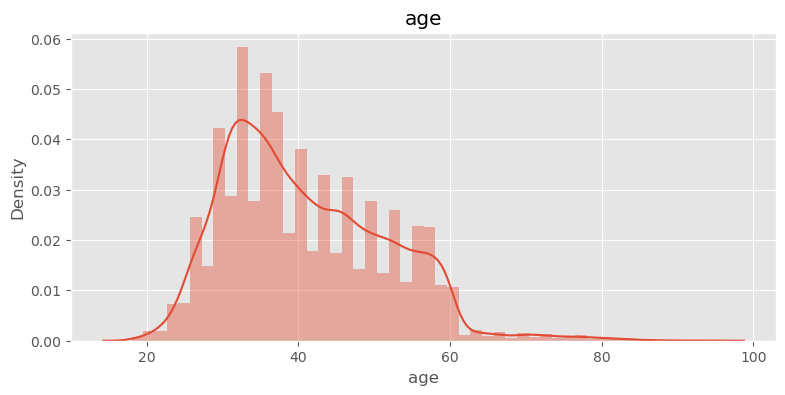

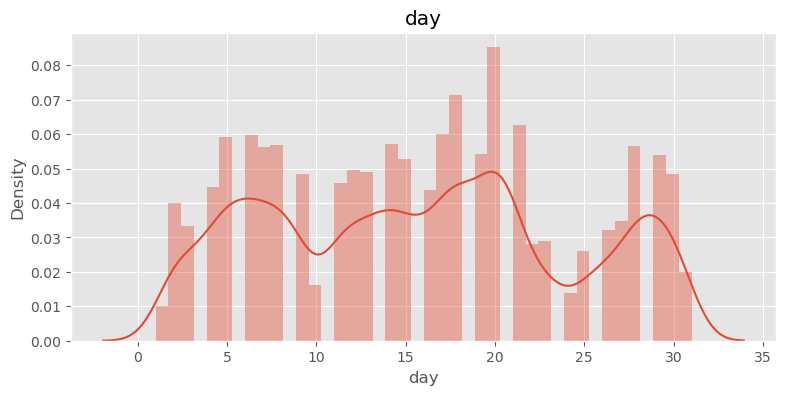

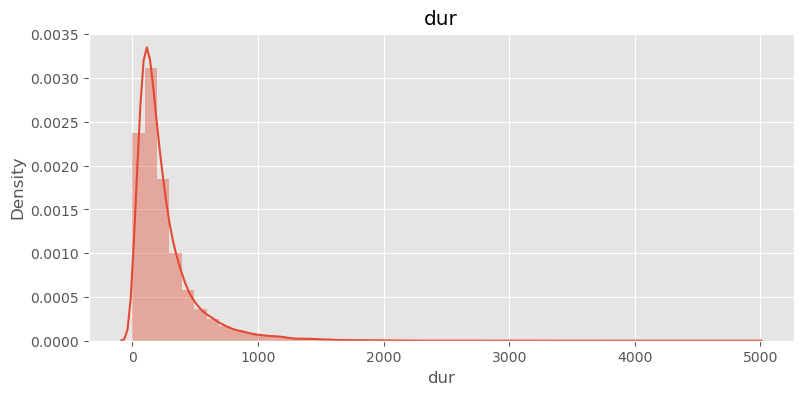

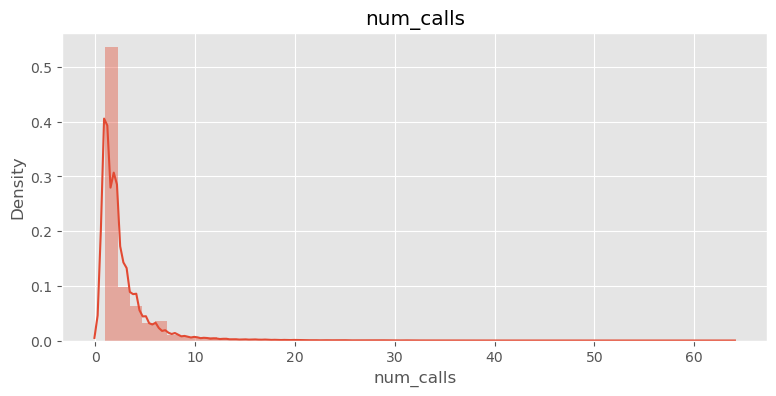

In [340]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "day", "dur",'num_calls']:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(dfr[column], kde=True)
    plt.title(column)


In [127]:
##Observation
##As we see from the above graphs , graphs are skwed and there is no normal distribution.

In [341]:
day_counts = dfr.groupby('day')['y'].value_counts(normalize=True) * 100
yes_counts = day_counts[:, 'yes']
no_counts = day_counts[:, 'no']

plt.bar(day_counts.index.levels[0], yes_counts, label='Yes')
plt.bar(day_counts.index.levels[0], no_counts, bottom=yes_counts, label='No')
plt.xlabel('Day of the Month')
plt.ylabel('Percentage of Customers')
plt.title('Customer Conversion by Day of the Month')
plt.legend()
plt.show()


KeyError: 'yes'

In [129]:
###from the above plot we can see that on days 1, 10 and 30th of the day of the month 
###is when customers have successfully converted and taken the insurance

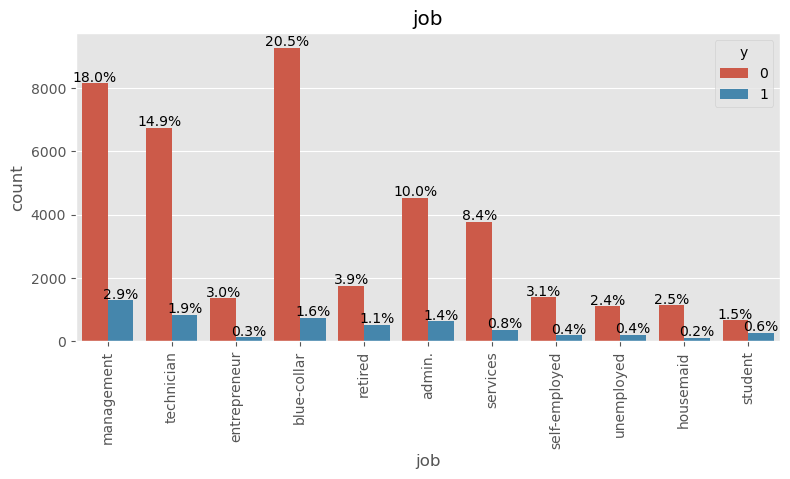

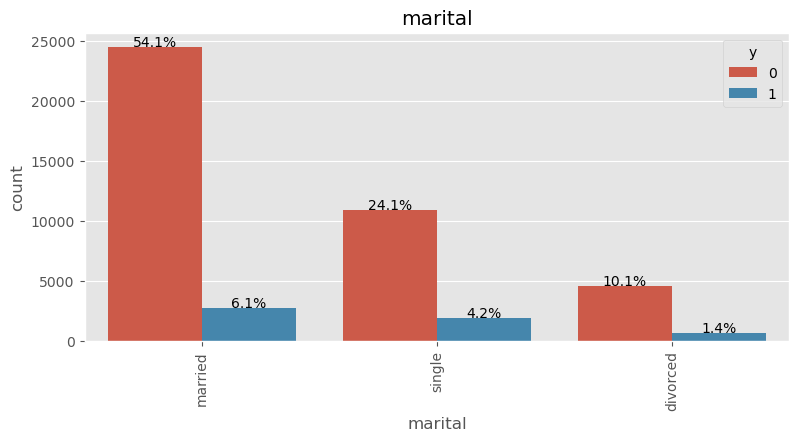

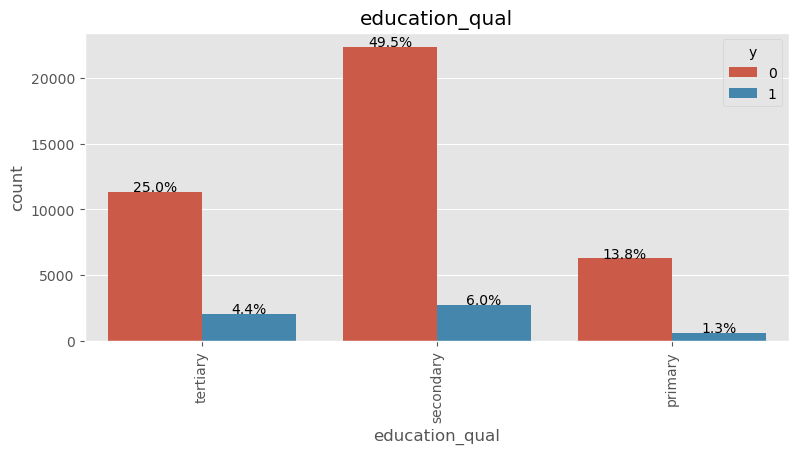

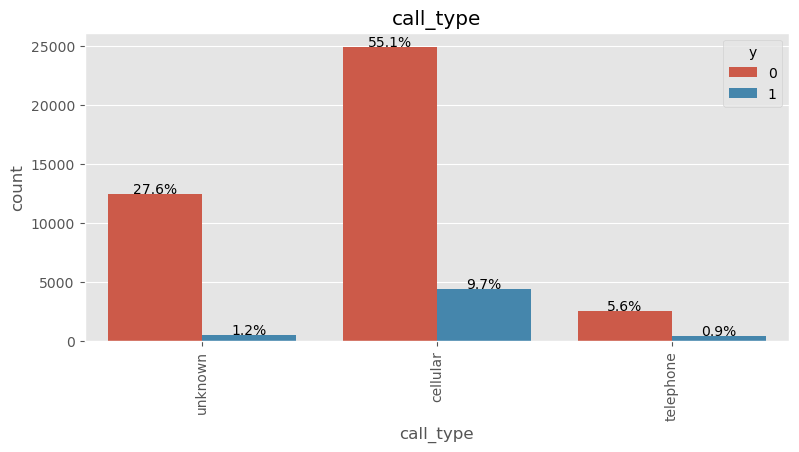

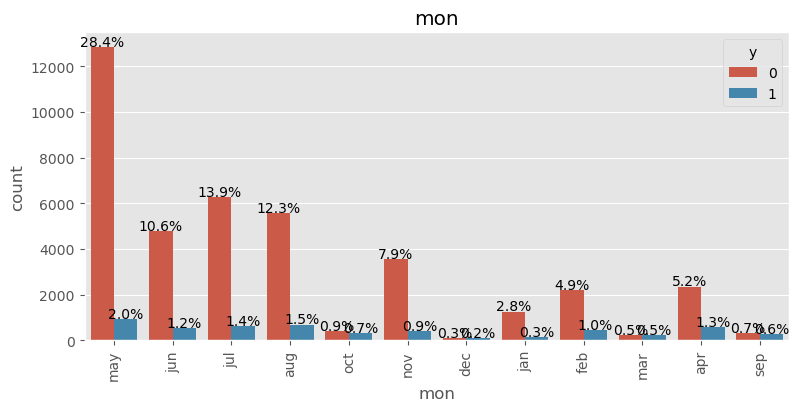

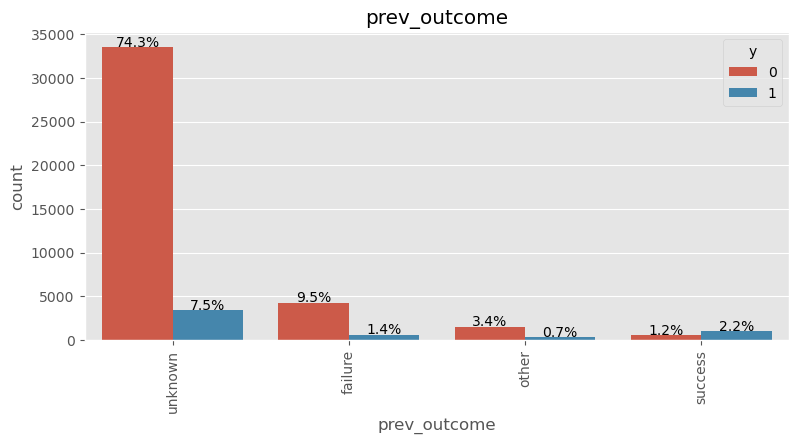

In [342]:
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.countplot(x=column, hue="y", data=dfr)
    plt.title(column)    
    plt.xticks(rotation=90)
    
    # Add percentage labels to the top of each bar
    for p in ax.patches:
        height = p.get_height()
        total = sum([p.get_height() for p in ax.patches if p.get_x() == p.get_x()])
        ax.text(p.get_x()+p.get_width()/2., height+50, f"{height/total*100:.1f}%", ha="center")
        
    plt.show()

In [131]:
###from the above bivariate analysis we infer the following
#1. cusotmers falling under management jobs are converted more 
#2. customers who are married are converted 
#3.secondary education qualified are converted the most
#4.cellphones are the preferred mode of contact
#5.may month is the preferred month to contact the customers


In [132]:
###handling outlierselm i
#oultiers cause significant impact on mean and varience and treating outliers depends on 
#the problem statement under consideration

In [343]:
dfr.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


In [344]:
# compute interquantile range to calculate the boundaries
lower_boundries= []
upper_boundries= []
for i in ["age", "dur", "day","num_calls"]:
    IQR= df[i].quantile(0.75) - dfr[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 10.5 , 70.5
dur : -221.0 , 643.0
day : -11.5 , 40.5
num_calls : -2.0 , 6.0


In [345]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ["age", "dur", "day","num_calls"]:
    dfr.loc[dfr[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1  

In [136]:
###Since,
##for age the lower boundary (10.5) < minimum value (18) for dur num_calls and day the lower boundaries are negative (-221.0), (-11.0),(-2.0) resp.
##replacing outliers with the lower boundary is not required

In [346]:
dfr.describe()
#After replacing the outliers with the upper boundary, the maximum values has been 
#changed without impacting any other parameters like mean, standard deviation and quartiles.

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.863666,15.80688,234.95620,2.392235,0.117000
std,10.380009,8.32234,176.75476,1.600152,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,70.000000,31.00000,643.00000,6.000000,1.000000


<AxesSubplot:>

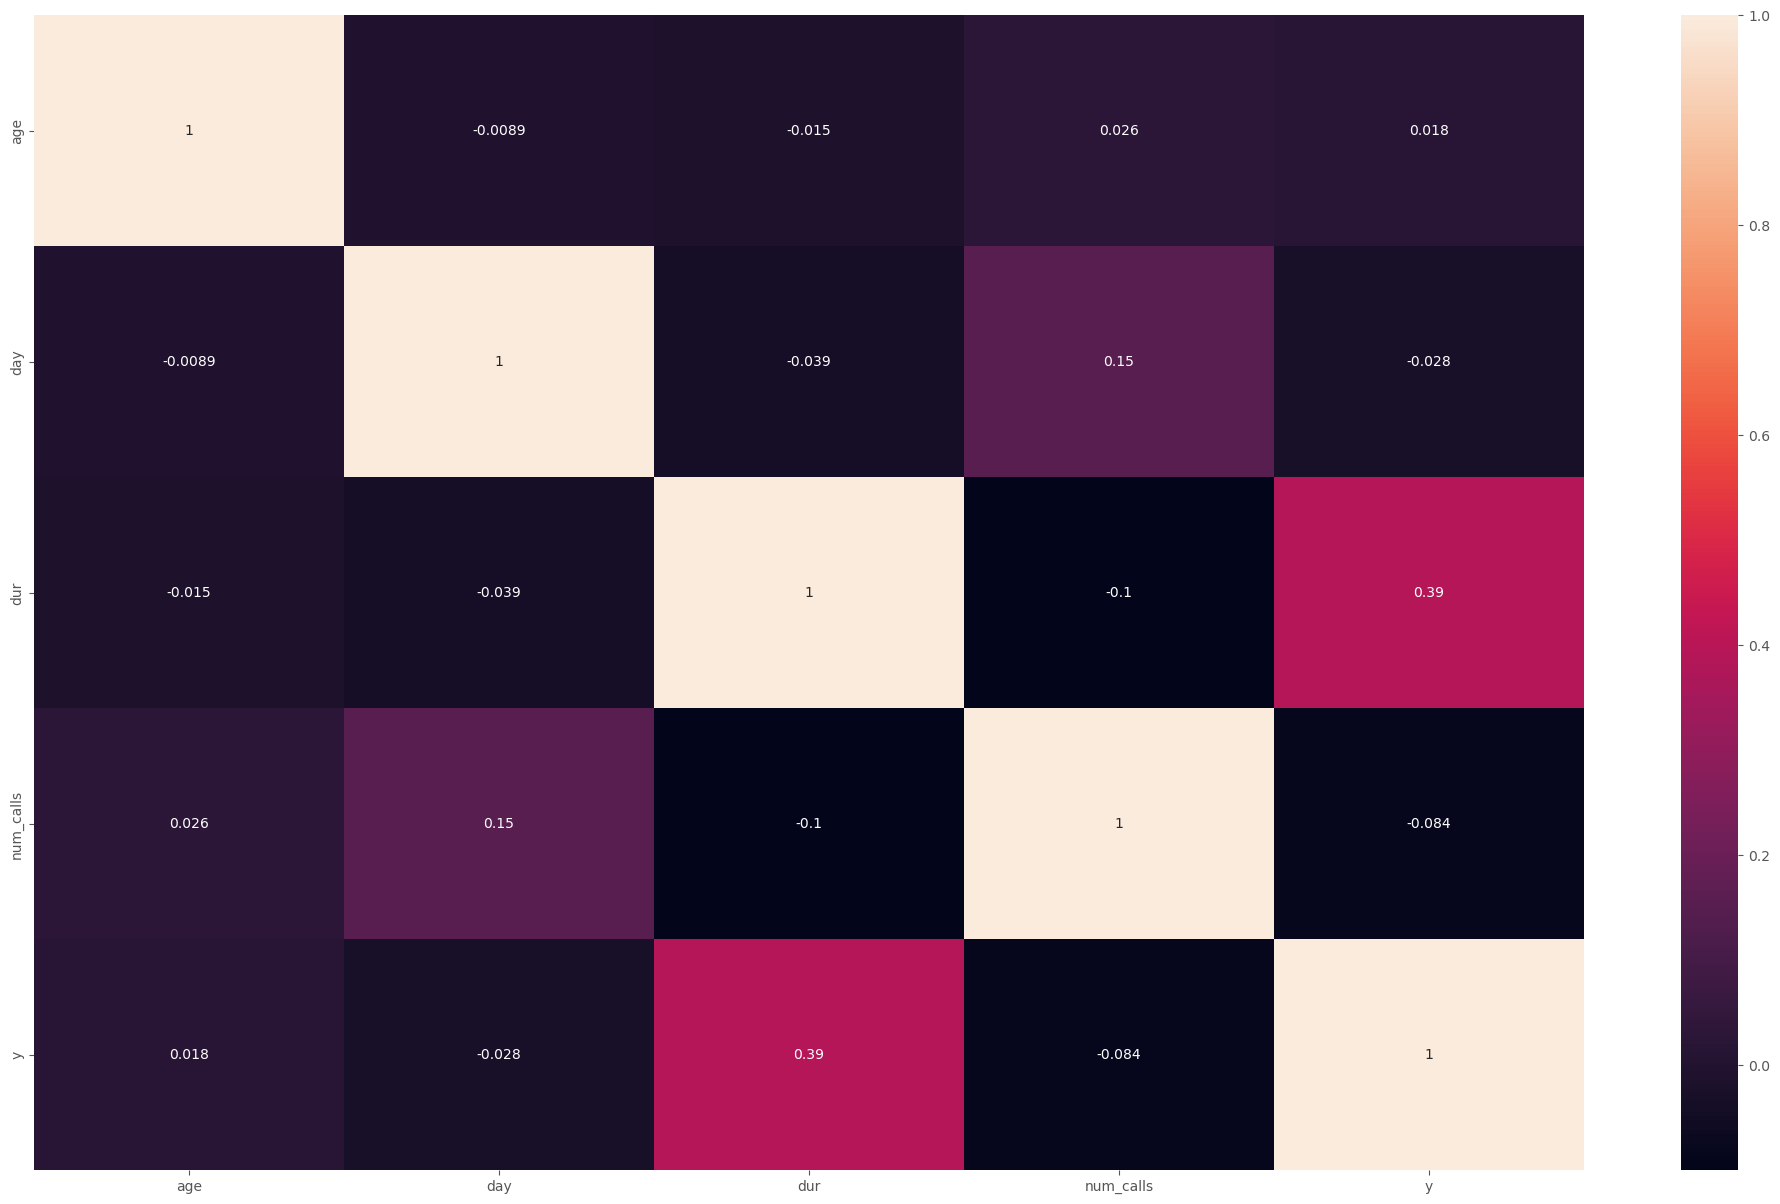

In [348]:
plt.figure(figsize=(25,15))
sns.heatmap(dfr.corr(), annot=True)

In [349]:
for i in cat_var:
    print(i, ":", dfr[i].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital : ['married' 'single' 'divorced']
education_qual : ['tertiary' 'secondary' 'primary']
call_type : ['unknown' 'cellular' 'telephone']
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome : ['unknown' 'failure' 'other' 'success']


In [350]:
def encoding_data(dfr,col):
  for i in col:
     df_dummies = pd.get_dummies(dfr[i], prefix=i)
     dfr = pd.concat([dfr, df_dummies], axis=1)
     dfr.drop([i],inplace=True,axis=1)
  return dfr

In [351]:
dfr

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643,3,unknown,1
45207,70,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,70,retired,married,secondary,cellular,17,nov,643,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [352]:
columns=['call_type','prev_outcome','marital','job']
dfr=encoding_data(dfr,columns)

In [353]:
dfr

,age,education_qual,day,mon,dur,num_calls,y,call_type_cellular,call_type_telephone,call_type_unknown,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,tertiary,5,may,261,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,44,secondary,5,may,151,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,33,secondary,5,may,76,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,47,secondary,5,may,92,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,33,secondary,5,may,198,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,17,nov,643,3,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
45207,70,primary,17,nov,456,2,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
45208,70,secondary,17,nov,643,5,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
45209,57,secondary,17,nov,508,4,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [354]:
#Months column
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

dfr['mon'] = dfr['mon'].apply(lambda x: months.index(x)+1)

In [286]:
dfr

,age,education_qual,day,mon,dur,num_calls,y,target,call_type_cellular,call_type_telephone,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,tertiary,5,5,261,1,no,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,44,secondary,5,5,151,1,no,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,secondary,5,5,76,1,no,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,47,unknown,5,5,92,1,no,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,5,5,198,1,no,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,17,11,643,3,yes,1,1,0,...,0,0,0,0,0,0,0,1,0,0
45207,70,primary,17,11,456,2,yes,1,1,0,...,0,0,0,1,0,0,0,0,0,0
45208,70,secondary,17,11,643,5,yes,1,1,0,...,0,0,0,1,0,0,0,0,0,0
45209,57,secondary,17,11,508,4,no,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [355]:
#'education_qual'
dfr.replace({'education_qual' : { 'tertiary' : 1, 'secondary' : 2, 'primary' : 3 }},inplace=True)

In [356]:
dfr

,age,education_qual,day,mon,dur,num_calls,y,call_type_cellular,call_type_telephone,call_type_unknown,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,1,5,5,261,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,44,2,5,5,151,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,33,2,5,5,76,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,47,2,5,5,92,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,33,2,5,5,198,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,17,11,643,3,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
45207,70,3,17,11,456,2,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
45208,70,2,17,11,643,5,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
45209,57,2,17,11,508,4,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [148]:
##Checking Correlation of feature variables

#There are no features that are highly correlated and inversely correlated. If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, 
#we could have drop those features. Because those correlated features would have been doing the same job.

#Split Dataset
#Separating independent and dependent variables


In [361]:
dfr

,age,education_qual,day,mon,dur,num_calls,y,call_type_cellular,call_type_telephone,call_type_unknown,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,1,5,5,261,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,44,2,5,5,151,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,33,2,5,5,76,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,47,2,5,5,92,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,33,2,5,5,198,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,17,11,643,3,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
45207,70,3,17,11,456,2,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
45208,70,2,17,11,643,5,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
45209,57,2,17,11,508,4,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [362]:
p= dfr.drop(['y'],axis=1)
q= dfr['y']


#Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it
#SMOTE Oversampling we are using due to imbalence data

In [204]:
pip install imblearn

In [363]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
# Define the SMOTETomek object with a 0.75 sampling strategy
smote_tomek = SMOTETomek(sampling_strategy=0.75)

# Apply SMOTETomek oversampling to the training data
X, y = smote_tomek.fit_resample(p, q)

# Check the class distribution of the resampled data
print(y.value_counts())

0    39488
1    29509
Name: y, dtype: int64


In [364]:
#Splitting resampled data in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scalling

In [207]:

pip install confusion_matrix

In [365]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Models

1.Logistic regression


In [366]:
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)
predicted=lr_model.predict(X_test)
conf = confusion_matrix(y_test, predicted)

print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
log_reg_y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_y_pred_prob)



The accuracy of Logistic Regression is :  92.27053140096618 %
The aurroc_auc_score of Logistic Regression is :  0.9755314518658696


2. XG BOOST


In [367]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train) 
predicted = xgb_model.predict(X_test)

print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Gradient Boosting is : ", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))
xgb_y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_y_pred_prob)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



The accuracy of X Gradient Boosting is :  93.50900307422046 %
The aurroc_auc_score of Gradient Boosting is :  0.9860318246503821


3.Random Forest

In [368]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
rf_model.fit(X_train, y_train)  
predicted = rf_model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
dt_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)
dt_auc = roc_auc_score(y_test, dt_y_pred_prob)

The accuracy of Random Forest is :  93.84716732542819 %
The aurroc_auc_score of  random forest is :  0.9864775584479611


From the observations and algorithms applied like Logistic regression, Random Forest , XG boost , more accuary is got from random forest alogrithm using SMOTE oversampling techniques.

Feature Importance

<AxesSubplot:>

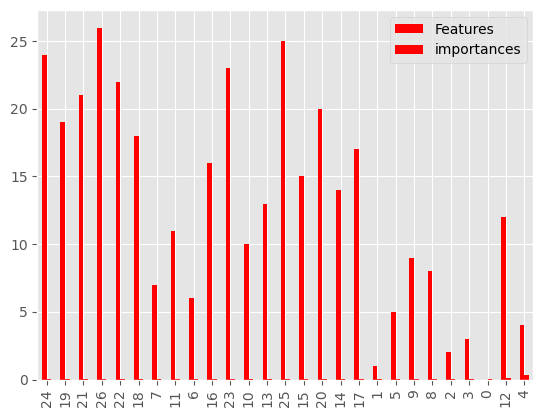

In [370]:
importances = rf_model.feature_importances_
df1 = pd.DataFrame({"Features":pd.DataFrame(X_test).columns,"importances":importances})
df1.set_index("importances")

df1 = df1.sort_values('importances')
df1.plot.bar(color='red')

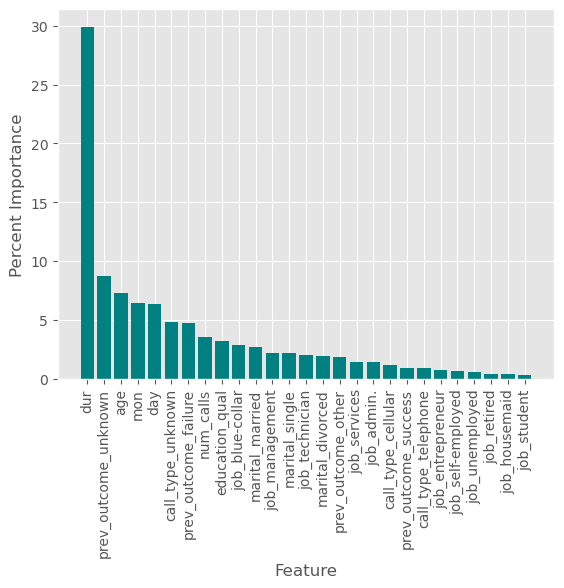

In [371]:
feature_names = list(dfr.columns)
if 'y' in feature_names:
    feature_names.remove('y')
total_importance = importances.sum()
percent_importances = importances / total_importance * 100

# Create a DataFrame with the feature names and their percent importances
dfr = pd.DataFrame({'feature_names': feature_names, 'percent_importances': percent_importances})

# Sort the DataFrame by percent importances in descending order
dfr = dfr.sort_values(by='percent_importances', ascending=False)

# Create a bar plot of the percent importances
plt.bar(x=dfr['feature_names'], height=dfr['percent_importances'], color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percent Importance')
plt.show()

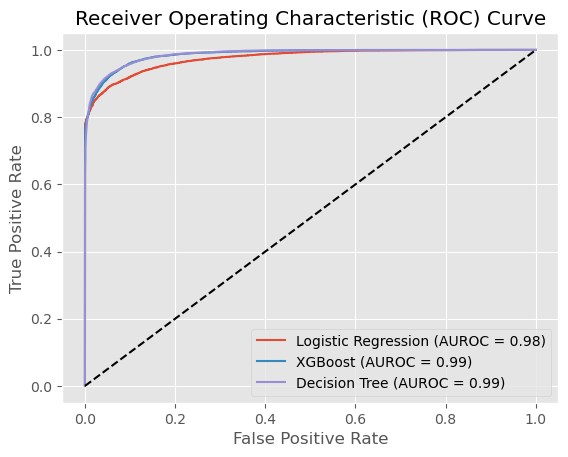

In [372]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_y_pred_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_pred_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)

# Plot ROC curves
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUROC = {log_reg_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUROC = {xgb_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUROC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Conclusion

Based on the results obtained from the evaluation of the three classification models (Logistic Regression, XGBoost, and Decision Tree Classifier) on the given historical data, XGBoost outperformed the other models with the highest accuracy score of 93.54% and the highest AUROC score of 0.986.

This implies that XGBoost is a suitable model for predicting whether a client will subscribe to the insurance or not. It is recommended to deploy this model in the production environment to accurately target potential customers and optimize marketing costs.

However, further analysis is recommended to identify the important features contributing to the model's performance and to fine-tune the model for better results.
